In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
import holidays  # To fetch public holidays

# Load the dataset (assuming it's loaded already in df)
df = pd.read_csv('sales_data.csv')

# Step 1: Date Handling & Feature Engineering
# Convert 'order_date' to datetime with the correct format (DD/MM/YYYY)
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Create year, month, day, weekday features from 'order_date'
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.weekday

# Adding 'season' feature based on the month
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
              7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df['season'] = df['month'].map(season_map)

# Feature Engineering: Discount percent and Discount impact
df['discount_percent'] = df['discount_amount'] / df['value'] * 100  # Discount percentage
df['discount_impact'] = df['total'] - df['value']  # Impact of discount on total sales

# Step 2: Handle Missing Values (Impute missing values)
# For simplicity, we use median for numerical columns and most frequent for categorical columns
numerical_cols = ['qty_ordered', 'price', 'value', 'discount_amount', 'total', 'discount_percent', 'discount_impact']
categorical_cols = ['category', 'payment_method', 'region', 'season']

# Numerical Imputation (median)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Scaling numerical features
])

# Categorical Imputation (mode) & Encoding (OneHotEncoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Step 3: Column Transformer to apply transformations to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 4: Aggregating data (Optional, if needed)
df_monthly = df.groupby(['year', 'month', 'category']).agg({
    'qty_ordered': 'sum',
    'total': 'sum',
    'discount_percent': 'mean',
    'discount_impact': 'mean'
}).reset_index()

# Step 5: Adding Holidays (Western & Indian holidays)
# Creating a list of Western Holidays (US)
western_holidays = holidays.UnitedStates(years=df['year'].unique())

# Creating a list of Indian Holidays (India)
indian_holidays = holidays.India(years=df['year'].unique())

# Add holiday information to the dataset
df['is_western_holiday'] = df['order_date'].isin(western_holidays).astype(int)
df['is_indian_holiday'] = df['order_date'].isin(indian_holidays).astype(int)

# Step 6: Drop irrelevant columns for modeling
columns_to_drop = ['order_id', 'sku', 'bi_st', 'cust_id', 'ref_num', 'Name Prefix', 'First Name',
                   'Middle Initial', 'Last Name', 'Gender', 'age', 'full_name', 'E Mail', 'Sign in date',
                   'Phone No. ', 'Place Name', 'County', 'City', 'State', 'Zip', 'User Name']

df.drop(columns=columns_to_drop, inplace=True)

# Check the first few rows of the dataframe after preprocessing
print(df.head())

# Step 7: Save or proceed with further analysis
df.to_csv('preprocessed_sales_data.csv', index=False)  # Optionally save the preprocessed data


  order_date    status  item_id  qty_ordered  price   value  discount_amount  \
0 2020-10-01  received   574772           21   89.9  1798.0              0.0   
1 2020-10-01  received   574774           11   19.0   190.0              0.0   
2 2020-10-01  complete   574777            9  149.9  1199.2              0.0   
3 2020-10-01  complete   574779            9   79.9   639.2              0.0   
4 2020-11-13  received   595185            2   99.9    99.9              0.0   

    total       category payment_method  ...  month  Region Discount_Percent  \
0  1798.0  Men's Fashion            cod  ...     10   South              0.0   
1   190.0  Men's Fashion            cod  ...     10   South              0.0   
2  1199.2  Men's Fashion            cod  ...     10   South              0.0   
3   639.2  Men's Fashion            cod  ...     10   South              0.0   
4    99.9  Men's Fashion            cod  ...     11   South              0.0   

   day  weekday  season discount_perce

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

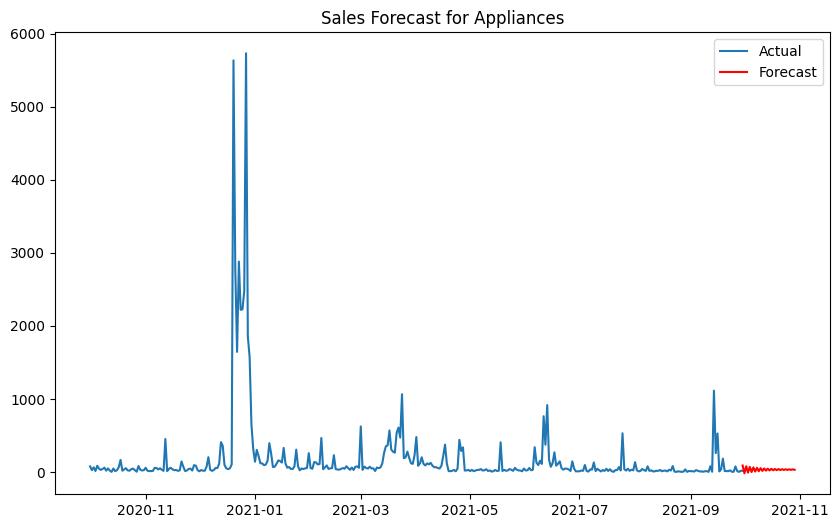

MAE for Appliances: 93.42049863576484


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


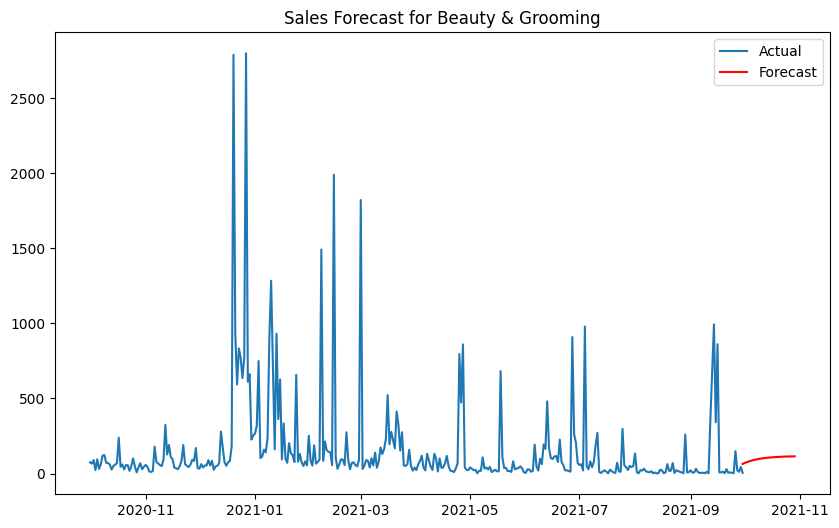

MAE for Beauty & Grooming: 149.86307145044847


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


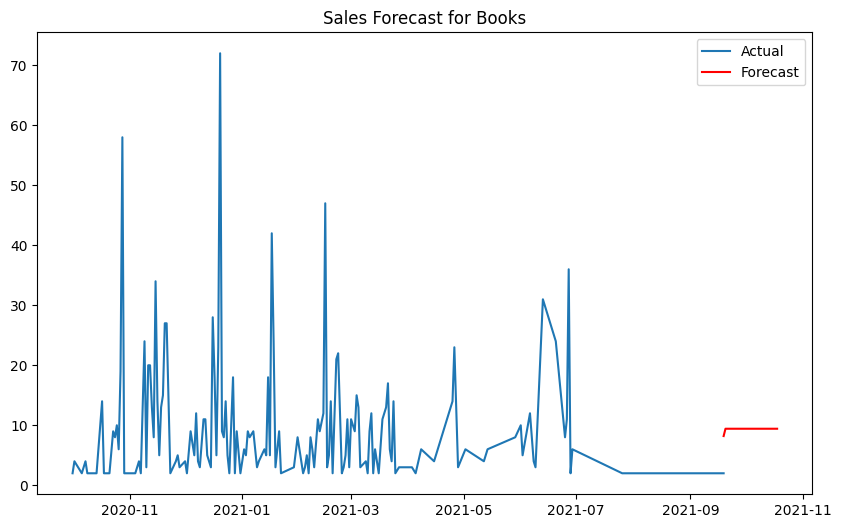

MAE for Books: 6.6287799390277655


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


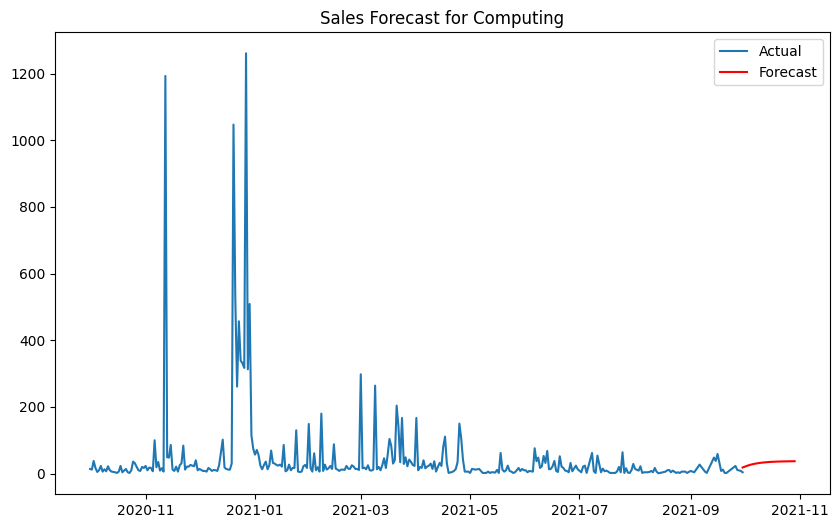

MAE for Computing: 23.730006125031846


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


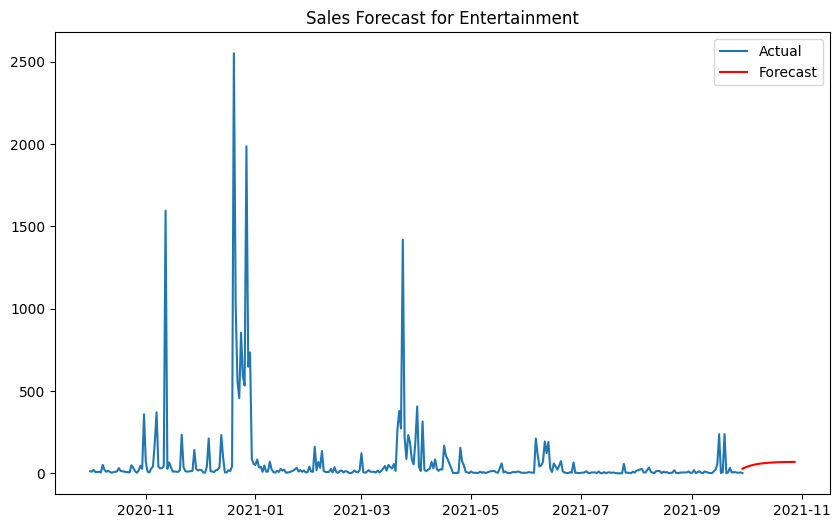

MAE for Entertainment: 57.58875083778853


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


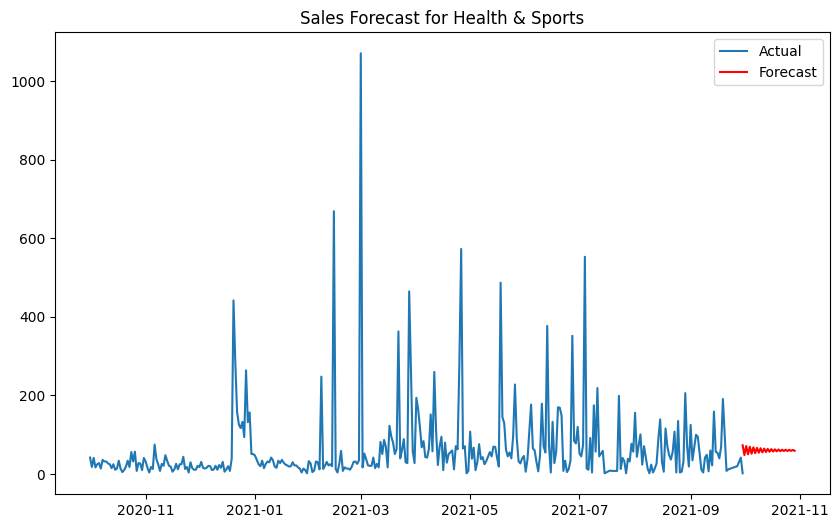

MAE for Health & Sports: 40.67993507643116


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


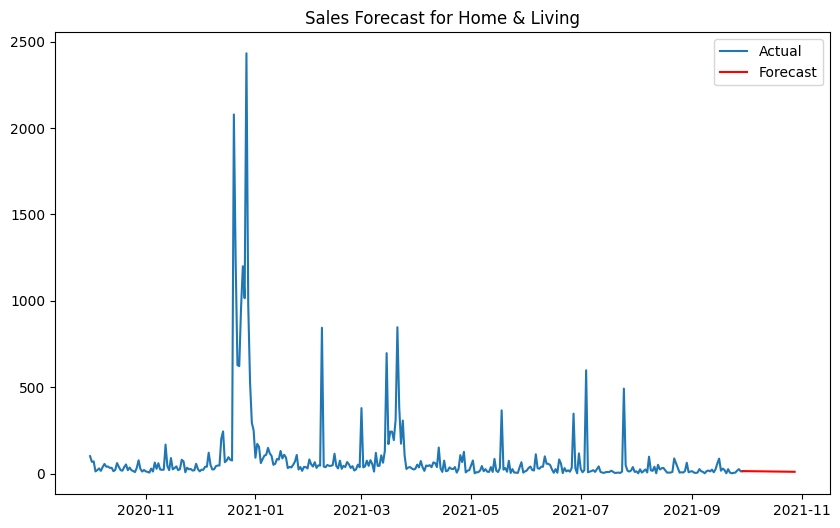

MAE for Home & Living: 10.649387992749512


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


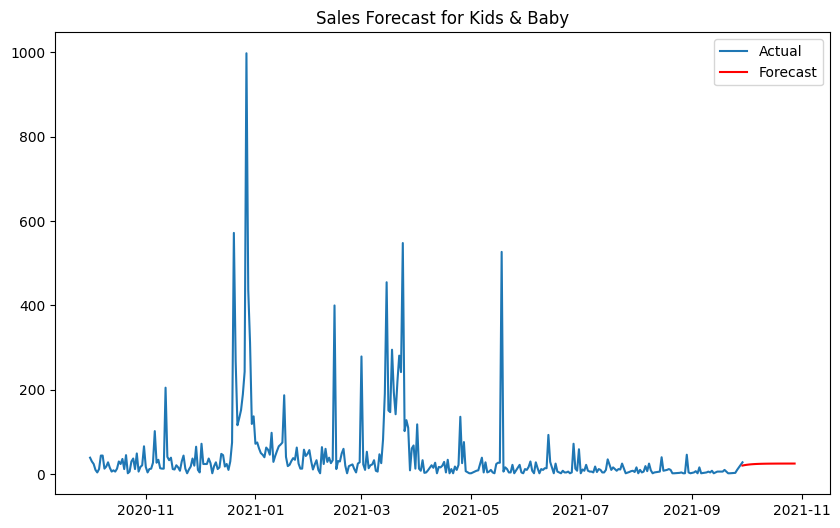

MAE for Kids & Baby: 18.90455515327604


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


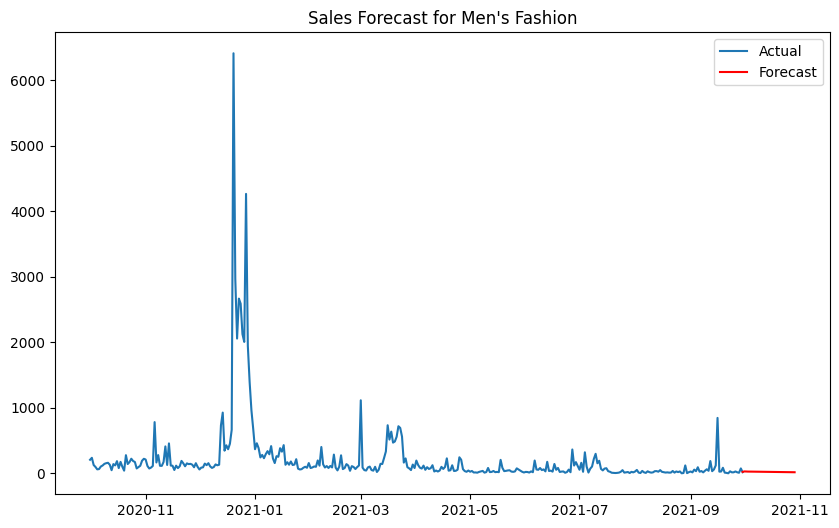

MAE for Men's Fashion: 51.8352123122327


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


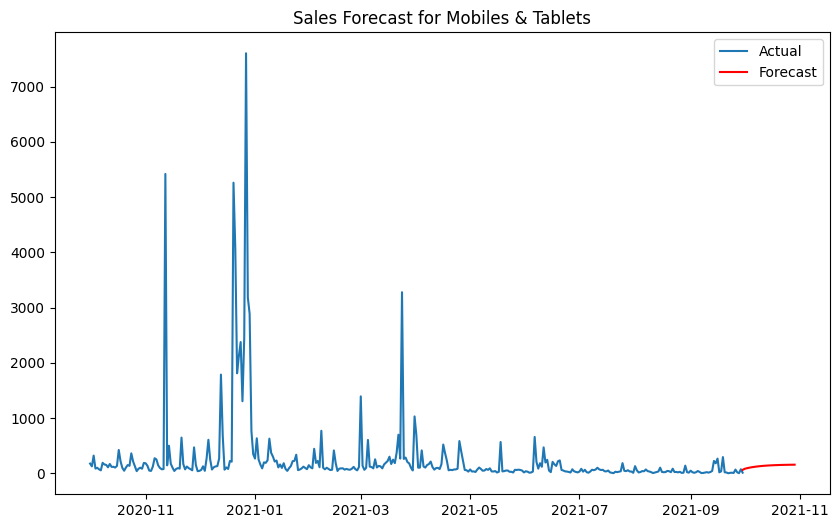

MAE for Mobiles & Tablets: 107.3933676835129


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


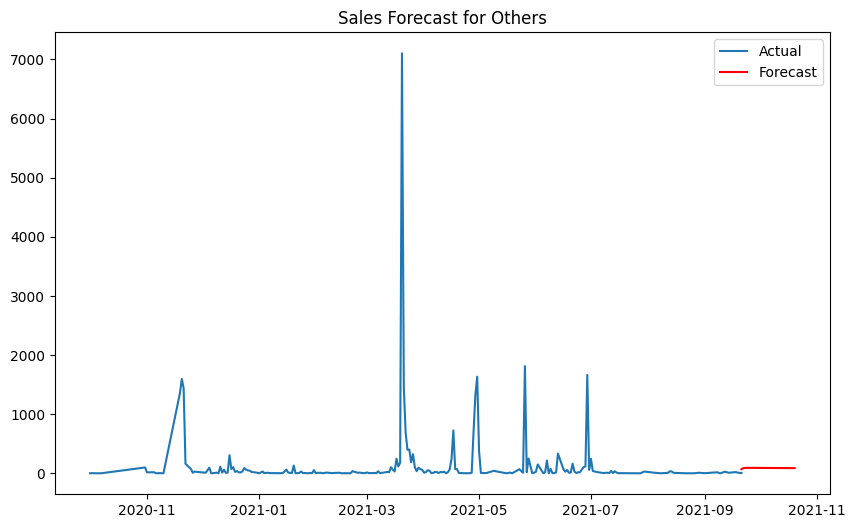

MAE for Others: 77.08910480467965


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


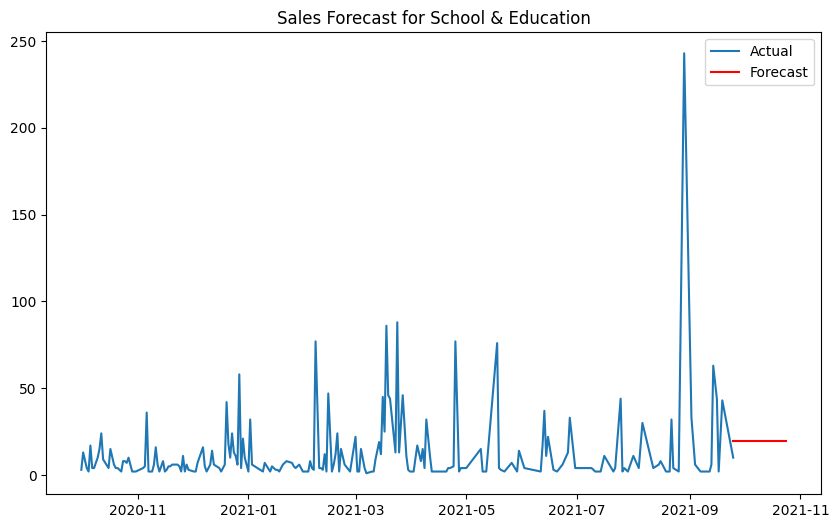

MAE for School & Education: 23.547679078984796


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


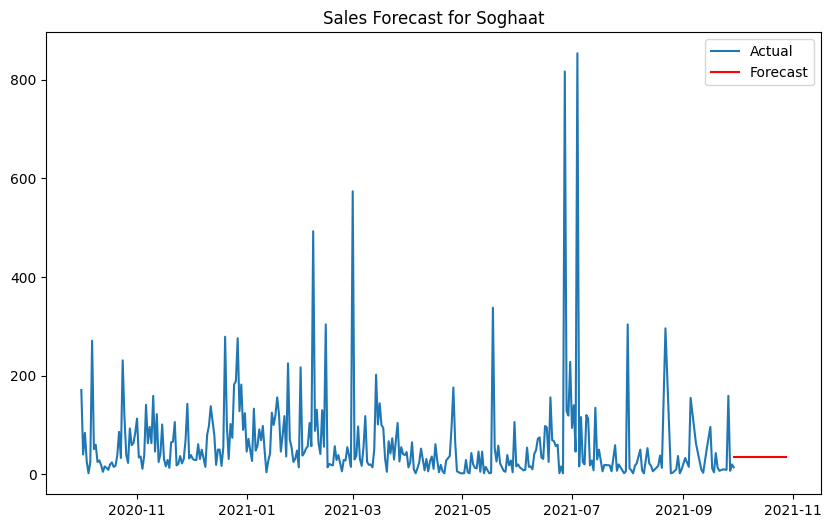

MAE for Soghaat: 37.58708056671808


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


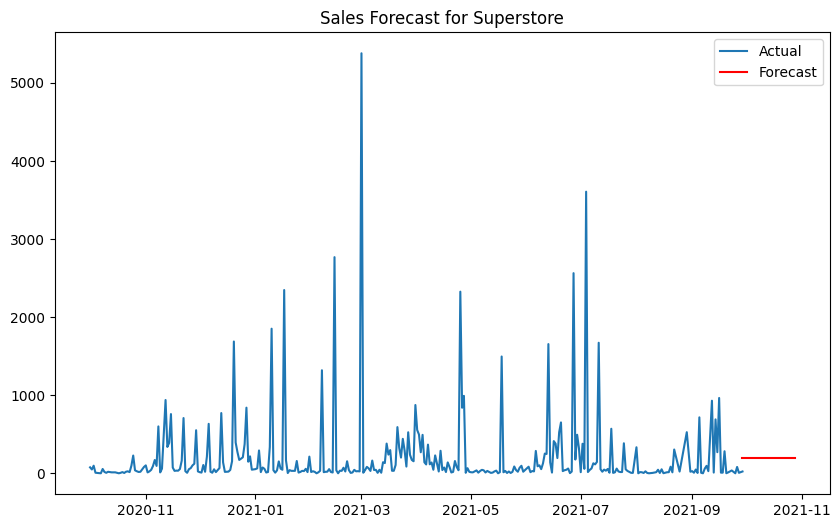

MAE for Superstore: 232.88670422773768


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


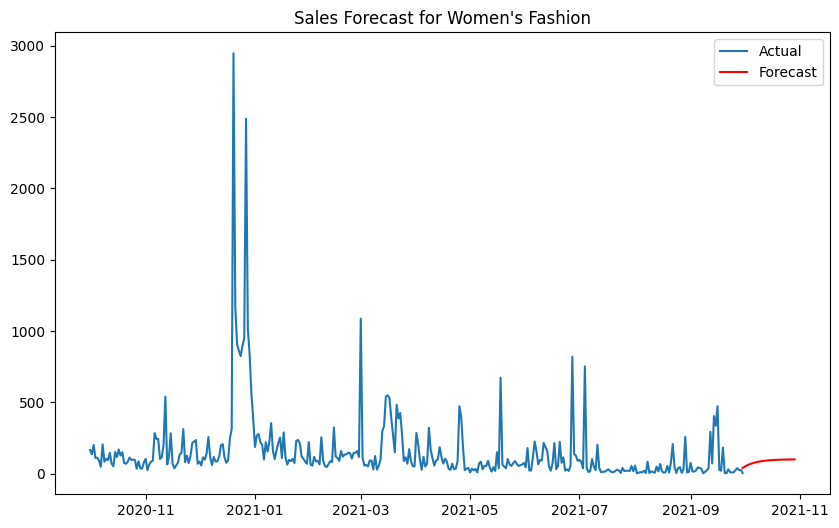

MAE for Women's Fashion: 92.84018865104888
Forecast for Appliances: 2021-10-01    89.048401
2021-10-02   -17.327632
2021-10-03    78.461135
2021-10-04    -7.794082
2021-10-05    69.876428
2021-10-06    -0.063785
2021-10-07    62.915503
2021-10-08     6.204343
2021-10-09    57.271222
2021-10-10    11.286866
2021-10-11    52.694546
2021-10-12    15.408040
2021-10-13    48.983539
2021-10-14    18.749702
2021-10-15    45.974462
2021-10-16    21.459295
2021-10-17    43.534546
2021-10-18    23.656375
2021-10-19    41.556135
2021-10-20    25.437880
2021-10-21    39.951937
2021-10-22    26.882418
2021-10-23    38.651169
2021-10-24    28.053724
2021-10-25    37.596439
2021-10-26    29.003480
2021-10-27    36.741210
2021-10-28    29.773592
2021-10-29    36.047745
2021-10-30    30.398038
Freq: D, Name: predicted_mean, dtype: float64
Forecast for Beauty & Grooming: 357     64.232073
358     69.681582
359     74.568908
360     78.952045
361     82.883008
362     86.408444
363     89.570187
364     

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from itertools import product

# Assuming df is preprocessed and contains 'order_date', 'qty_ordered', and 'category'

# Step 1: Aggregating data by day and category
df_daily = df.groupby(['order_date', 'category']).agg({'qty_ordered': 'sum'}).reset_index()

# Step 2: Set the order_date as index
df_daily.set_index('order_date', inplace=True)

# Step 3: Function for GridSearchCV to optimize ARIMA hyperparameters

def optimize_arima_model(series):
    # Define parameter grid for ARIMA model
    p = d = q = range(0, 3)
    pdq = list(product(p, d, q))  # (p, d, q) combinations

    best_model = None
    best_aic = np.inf  # We'll use AIC (Akaike Information Criterion) to compare models

    # Perform grid search for ARIMA model
    for param in pdq:
        try:
            # Fit ARIMA model
            model = ARIMA(series, order=param)
            results = model.fit()

            # Compare AIC values
            if results.aic < best_aic:
                best_aic = results.aic
                best_model = results
        except Exception as e:
            continue

    return best_model

# Step 4: Forecasting for each category

categories = df_daily['category'].unique()
forecast_results = {}

for category in categories:
    # Filter data for the current category
    category_data = df_daily[df_daily['category'] == category]['qty_ordered']

    # Step 4.1: Optimize the ARIMA model for the current category
    best_arima_model = optimize_arima_model(category_data)

    # Step 4.2: Forecast the next 30 days (or 7 days if you prefer)
    forecast = best_arima_model.forecast(steps=30)  # Change to 7 for 7-day forecast

    # Store the forecasted values
    forecast_results[category] = forecast

    # Step 4.3: Plot the forecast vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(category_data.index, category_data, label='Actual')
    plt.plot(pd.date_range(category_data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
    plt.title(f'Sales Forecast for {category}')
    plt.legend()
    plt.show()

    # Print MAE for model evaluation
    mae = mean_absolute_error(category_data[-30:], forecast)  # Use the last 30 days for testing
    print(f"MAE for {category}: {mae}")

    # Step 5: Save the forecast data for each category to CSV
    forecast_df = pd.DataFrame({
        'date': pd.date_range(category_data.index[-1], periods=30, freq='D'),
        'forecast_sales': forecast
    })
    forecast_df.to_csv(f'{category}_forecast_arima.csv', index=False)

# Step 6: Print forecast results for each category
for category, forecast in forecast_results.items():
    print(f"Forecast for {category}: {forecast}")


In [9]:
import pandas as pd
import os
import openai


openai.api_key = ''#openai_api_key

# List of all categories
categories = ["Men's Fashion", 'Mobiles & Tablets', 'Computing', 'Appliances',
              'Home & Living', "Women's Fashion", 'Health & Sports',
              'Beauty & Grooming', 'Superstore', 'Others', 'Entertainment',
              'Soghaat', 'Kids & Baby', 'Books', 'School & Education']


inventory_df = pd.read_csv('category_stock_inventory.csv')


sales_predictions = {}


sales_pred_folder = '/content/'
for category in categories:
    file_path = os.path.join(sales_pred_folder, f"{category}_forecast_arima.csv")
    if os.path.exists(file_path):
        sales_predictions[category] = pd.read_csv(file_path)
    else:
        print(f"File for {category} not found!")


category_sales_info = []

for category, df in sales_predictions.items():
    
    total_predicted_sales = df['forecast_sales'].sum()  
    # Get the current stock from inventory
    current_stock = inventory_df[inventory_df['category'] == category]['remaining_stock'].values

    if len(current_stock) == 0:
       
        current_stock = 0
    else:
        current_stock = current_stock[0]

    
    category_sales_info.append({'category': category, 'total_predicted_sales': total_predicted_sales,
                               'current_stock': current_stock})

category_sales_df = pd.DataFrame(category_sales_info)

# Save this information to a CSV file for later use in the RAG model
category_sales_df.to_csv('category_sales_knowledge_base.csv', index=False)

# Step 3: Set up a function to retrieve information from the knowledge base
def retrieve_category_info(category):
    # Search for the category in the knowledge base
    category_info = category_sales_df[category_sales_df['category'] == category]

    if category_info.empty:
        return None

    # Return the total predicted sales and current stock for the given category
    return category_info[['category', 'total_predicted_sales', 'current_stock']].to_dict(orient='records')[0]


def query_openai_for_suggestions(category_data):
    if category_data is None:
        return "No data available for the category."

    
    messages = [
        {"role": "system", "content": "You are an expert in inventory and stock management."},
        {
            "role": "user",
            "content": (
                f"Given the following information for the category '{category_data['category']}':\n"
                f"Total Predicted Sales for the next 30 days: {category_data['total_predicted_sales']}\n"
                f"Current Stock: {category_data['current_stock']}\n"
                "What is your recommendation regarding stocking for this category?"
            )
        }
    ]

    # Call the OpenAI Chat API
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=200
    )
    return response['choices'][0]['message']['content'].strip()

def query_openai_for_all_categories(category_sales_df):
    suggestions = {}

    for _, row in category_sales_df.iterrows():
        category_data = {
            "category": row['category'],
            "total_predicted_sales": row['total_predicted_sales'],
            "current_stock": row['current_stock']
        }
        suggestion = query_openai_for_suggestions(category_data)
        suggestions[category_data['category']] = suggestion
        print(f"Category: {category_data['category']}\nSuggestion: {suggestion}\n")

    return suggestions


all_category_suggestions = query_openai_for_all_categories(category_sales_df)


suggestions_df = pd.DataFrame(list(all_category_suggestions.items()), columns=['Category', 'Suggestion'])
suggestions_df.to_csv('stocking_suggestions.csv', index=False)


Category: Men's Fashion
Suggestion: Based on the information provided, it is recommended to increase the stock level for the 'Men's Fashion' category. 

With a total predicted sales of 700.35 units for the next 30 days and a current stock level of 380 units, it appears that there is a potential stock shortage if demand meets the prediction. 

To avoid stockouts and satisfy customer demand, I suggest increasing the stock level by procuring additional inventory to align with the predicted sales. This will help ensure that you have enough products available to meet customer demand and maximize sales opportunities in the 'Men's Fashion' category.

Category: Mobiles & Tablets
Suggestion: Based on the information provided, here is my recommendation for stocking the 'Mobiles & Tablets' category:

1. Calculate the average daily sales: Total Predicted Sales / 30 days = 4008.1429779034684 / 30 ≈ 133.61 sales per day
2. Estimate the days of stock left: Current Stock / Average Daily Sales = 220 / 


Processing category: Appliances


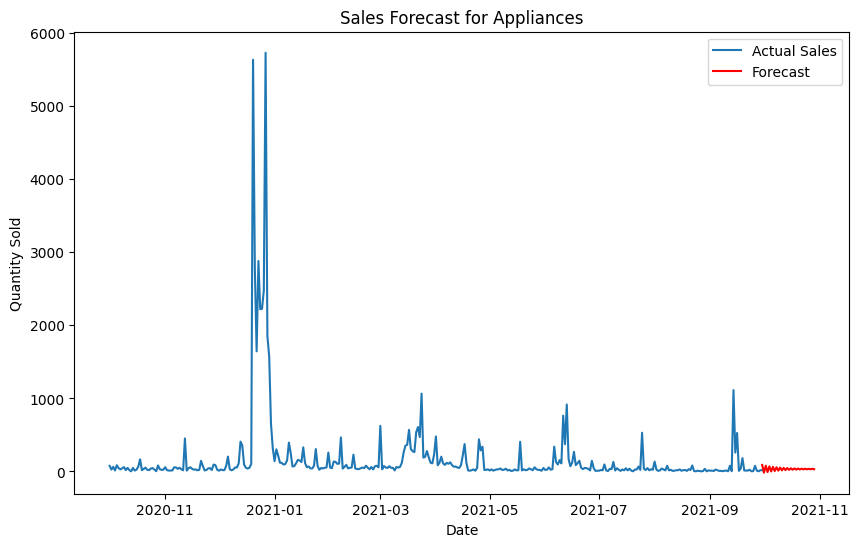

LLM Suggestion for Appliances: Based on the forecasted sales of 1020.43 units for the next 30 days and the current stock level of 190 units in the Appliances category, it appears that there will be a significant demand exceeding the current stock level.

Given this information, my recommendation would be to increase the stock level for the Appliances category to meet the forecasted sales demand. It is important to ensure that there is enough inventory on hand to fulfill customer orders and prevent stockouts. 

I would suggest placing an order for additional inventory to bring the stock level up to a level that can satisfy the forecasted sales demand and potential fluctuations in customer orders. Proper stock management practices will help maintain customer satisfaction and improve overall efficiency in the inventory management process.
Mean Absolute Error (MAE) for Appliances: 93.42049863576484

Processing category: Beauty & Grooming


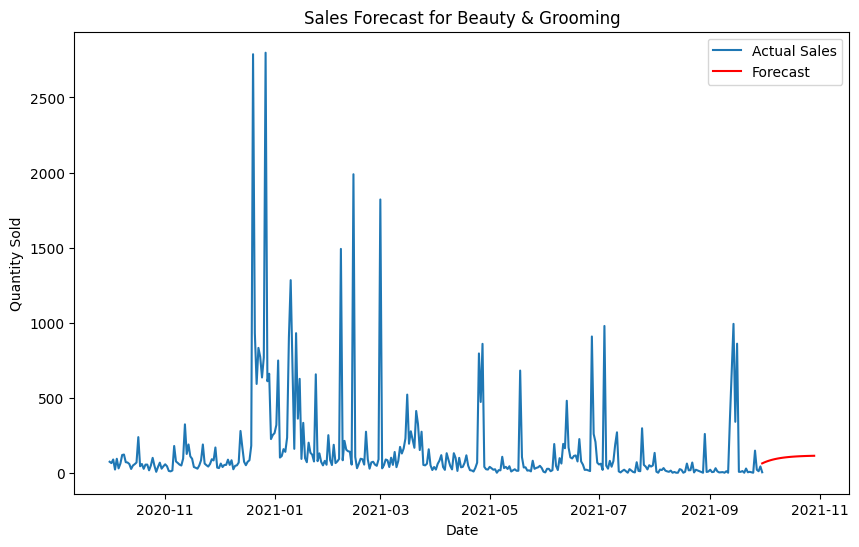

LLM Suggestion for Beauty & Grooming: Based on the forecasted sales for the next 30 days and the current stock level for the 'Beauty & Grooming' category, it is evident that there is a high likelihood of running out of stock if no action is taken. 

To ensure that there are enough products available to meet customer demand and prevent stockouts, I would recommend increasing the stock level for the 'Beauty & Grooming' category. This could involve either increasing the quantity of existing products in stock or placing additional orders to replenish the inventory.

By proactively managing the stock levels and aligning them with the forecasted sales, you can minimize the risk of stockouts and maximize sales opportunities in this category.
Mean Absolute Error (MAE) for Beauty & Grooming: 149.86307145044847

Processing category: Books


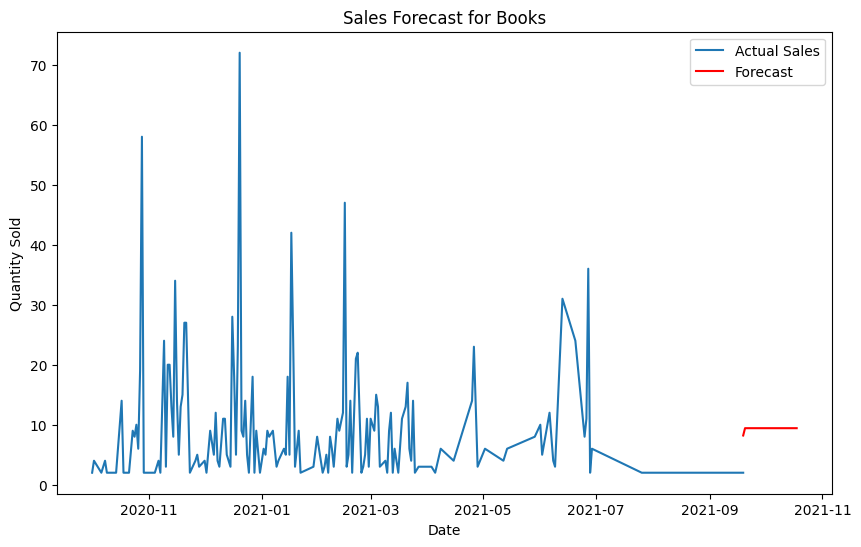

LLM Suggestion for Books: Based on the forecasted sales for the next 30 days and the current stock level for the category "Books," it appears that the demand is very close to the existing stock level. To ensure that you do not experience stockouts and can fulfill customer orders in a timely manner, I would recommend increasing the stock level slightly.

I would suggest increasing the stock level by at least 10 to 15 units to create a buffer and avoid any potential stock shortages. This will help you meet the expected demand and provide better service to customers without incurring any significant holding costs.

It's essential to strike a balance between carrying excess inventory and having enough stock to meet customer demand effectively. Regularly monitoring sales trends and adjusting stock levels accordingly will help optimize inventory management and improve overall efficiency in the category "Books."
Mean Absolute Error (MAE) for Books: 6.6287799390277655

Processing category: Com

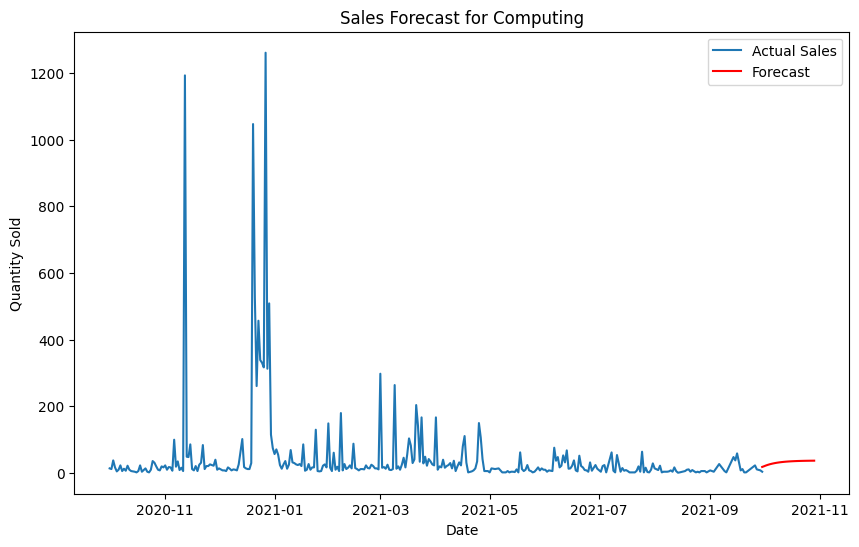

LLM Suggestion for Computing: Based on the forecasted sales of 971.86 units for the next 30 days and the current stock level of 300 units, I would recommend increasing the stock level for the 'Computing' category to meet the predicted demand. 

It's important to ensure that there is enough inventory on hand to satisfy customer orders and prevent stockouts. I would suggest placing an order for additional units to bring the stock level closer to the predicted sales volume. This way, you can avoid potential lost sales due to insufficient availability of the computing products.

Keep in mind the lead time for acquiring new stock and consider factors like supplier reliability and storage capacity when determining the appropriate reorder quantity. Regularly monitoring sales data and adjusting stock levels accordingly will help optimize inventory management for this category.
Mean Absolute Error (MAE) for Computing: 23.730006125031846

Processing category: Entertainment


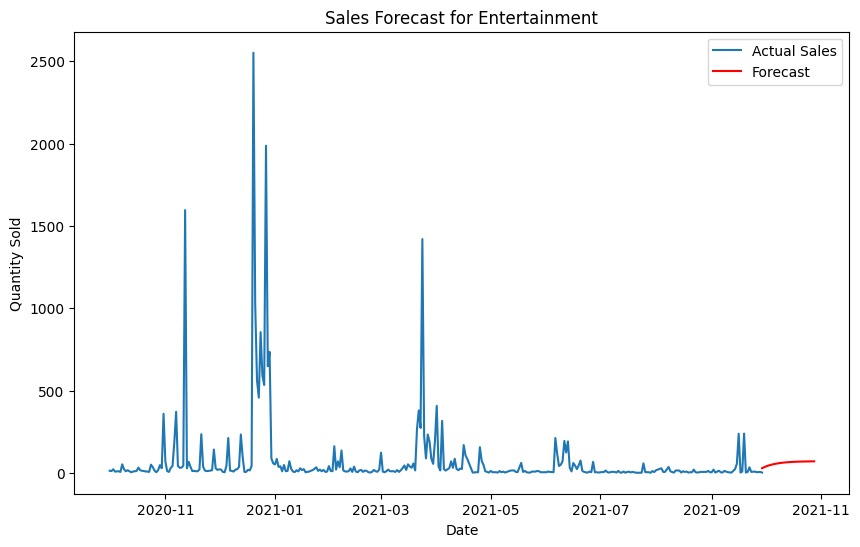

LLM Suggestion for Entertainment: Based on the forecasted sales for the next 30 days and the current stock level of 250, it appears that there is an excess of stock in the Entertainment category. 

Since the forecasted sales are lower than the current stock level, it would be advisable to reduce the stock level through strategies such as promotions, discounts, or cross-selling to increase sales velocity and prevent excess inventory.

By implementing these strategies, you can optimize inventory levels, prevent stockouts, and improve overall inventory turnover in the Entertainment category. Additionally, monitor sales closely and adjust your stocking levels accordingly to maintain an optimal balance between supply and demand.
Mean Absolute Error (MAE) for Entertainment: 57.58875083778853

Processing category: Health & Sports


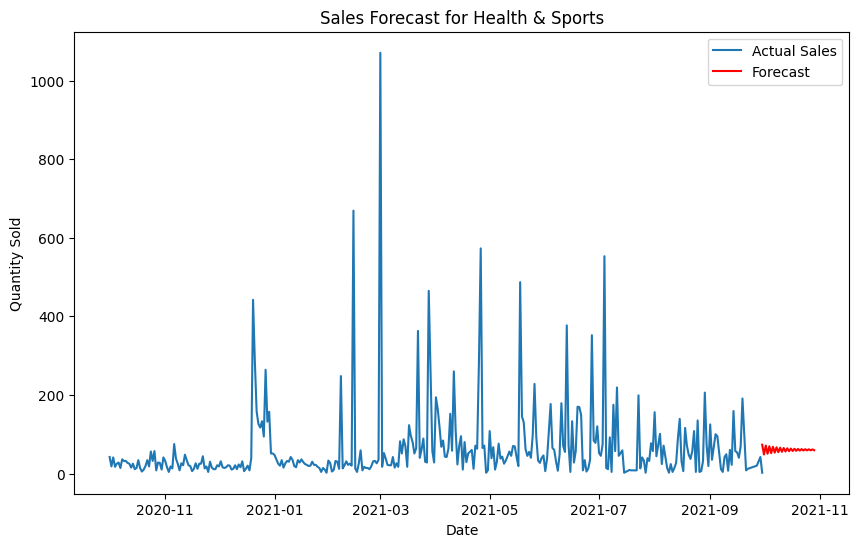

KeyboardInterrupt: 

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from itertools import product
import openai

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


openai.api_key = ""#openai api key

# Load inventory data from CSV
inventory_df = pd.read_csv('category_stock_inventory.csv')

# Ensure the inventory data has 'category' and 'current_stock' columns
inventory = dict(zip(inventory_df['category'], inventory_df['remaining_stock']))

# Assuming df is preprocessed and contains 'order_date', 'qty_ordered', and 'category'
# Aggregating data by day and category
df_daily = df.groupby(['order_date', 'category']).agg({'qty_ordered': 'sum'}).reset_index()

# Step 2: Set the order_date as index
df_daily['order_date'] = pd.to_datetime(df_daily['order_date'])
df_daily.set_index('order_date', inplace=True)

# Function for optimizing ARIMA hyperparameters
def optimize_arima_model(series):
    p = d = q = range(0, 3)  # Define ARIMA parameter ranges
    pdq = list(product(p, d, q))
    best_model = None
    best_aic = np.inf

    for param in pdq:
        try:
            model = ARIMA(series, order=param)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_model = results
        except:
            continue
    return best_model

# Function to query LLM for stocking suggestions
def query_llm_for_suggestions(category_data, forecast):
    messages = [
        {"role": "system", "content": "You are an expert in inventory and stock management."},
        {
            "role": "user",
            "content": (
                f"Category: {category_data['category']}\n"
                f"Forecasted sales for the next 30 days: {forecast.sum()}\n"
                f"Current stock level: {category_data['current_stock']}\n"
                f"Given the following information for the category '{category_data['category']}':\n"
                f"Total Predicted Sales for the next 30 days: {forecast.sum()}\n"
                f"Current Stock: {category_data['current_stock']}\n"
                "What is your recommendation regarding stocking for this category?"
            )
        }
    ]

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=200
    )
    return response['choices'][0]['message']['content'].strip()

# Processing each category sequentially
for category in df_daily['category'].unique():
    print(f"\nProcessing category: {category}")

    
    category_data = df_daily[df_daily['category'] == category]['qty_ordered']

    if len(category_data) < 30:
        print(f"Not enough data for {category} to make a reliable forecast.")
        continue

    best_model = optimize_arima_model(category_data)
    forecast = best_model.forecast(steps=30)

    plt.figure(figsize=(10, 6))
    plt.plot(category_data.index, category_data, label='Actual Sales')
    plt.plot(pd.date_range(category_data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
    plt.title(f'Sales Forecast for {category}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.show()

    category_info = {
        "category": category,
        "current_stock": inventory.get(category, 0)  # Default to 0 if category not in inventory
    }
    suggestion = query_llm_for_suggestions(category_info, forecast)
    print(f"LLM Suggestion for {category}: {suggestion}")

    forecast_df = pd.DataFrame({
        'date': pd.date_range(category_data.index[-1], periods=30, freq='D'),
        'forecast_sales': forecast
    })
    forecast_df.to_csv(f'{category}_forecast_arima.csv', index=False)

    mae = mean_absolute_error(category_data[-30:], forecast[-30:]) if len(category_data) > 30 else None
    print(f"Mean Absolute Error (MAE) for {category}: {mae if mae is not None else 'Not enough data for MAE'}")
